In [1]:
# A linear regression learning algorithm example using TensorFlow library.

# Author: Aymeric Damien
# Project: https://github.com/aymericdamien/TensorFlow-Examples/

In [2]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

In [3]:
# Parameters
learning_rate = 0.01
training_epochs = 2000
display_step = 50

In [4]:
# Training Data
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

In [5]:
# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

In [6]:
# Create Model

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

In [7]:
# Construct a linear model
activation = tf.add(tf.mul(X, W), b)

In [8]:
# Minimize the squared errors
cost = tf.reduce_sum(tf.pow(activation-Y, 2))/(2*n_samples) #L2 loss
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost) #Gradient descent

In [9]:
# Initializing the variables
init = tf.initialize_all_variables()

In [10]:
# Iteratively minimize cost
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if epoch % display_step == 0:
            print "Epoch:", '%04d' % (epoch+1), "cost=", \
                "{:.9f}".format(sess.run(cost, feed_dict={X: train_X, Y:train_Y})), \
                "W=", sess.run(W), "b=", sess.run(b)

    print "Optimization Finished!"
    print "cost=", sess.run(cost, feed_dict={X: train_X, Y: train_Y}), \
          "W=", sess.run(W), "b=", sess.run(b)
        
    Yprime = sess.run(W) * train_X + sess.run(b)
    

Epoch: 0001 cost= 0.179828495 W= 0.436999 b= -0.223739
Epoch: 0051 cost= 0.135100484 W= 0.384448 b= -0.168666
Epoch: 0101 cost= 0.128382683 W= 0.376428 b= -0.110968
Epoch: 0151 cost= 0.122440830 W= 0.368884 b= -0.0567011
Epoch: 0201 cost= 0.117185369 W= 0.361789 b= -0.00566181
Epoch: 0251 cost= 0.112537064 W= 0.355117 b= 0.0423419
Epoch: 0301 cost= 0.108425774 W= 0.34884 b= 0.0874908
Epoch: 0351 cost= 0.104789473 W= 0.342938 b= 0.129954
Epoch: 0401 cost= 0.101573393 W= 0.337386 b= 0.169892
Epoch: 0451 cost= 0.098728925 W= 0.332165 b= 0.207455
Epoch: 0501 cost= 0.096213169 W= 0.327254 b= 0.242784
Epoch: 0551 cost= 0.093988165 W= 0.322635 b= 0.276011
Epoch: 0601 cost= 0.092020348 W= 0.318291 b= 0.307263
Epoch: 0651 cost= 0.090279996 W= 0.314205 b= 0.336656
Epoch: 0701 cost= 0.088740885 W= 0.310362 b= 0.3643
Epoch: 0751 cost= 0.087379679 W= 0.306748 b= 0.390301
Epoch: 0801 cost= 0.086175911 W= 0.303349 b= 0.414755
Epoch: 0851 cost= 0.085111357 W= 0.300152 b= 0.437754
Epoch: 0901 cost= 0.0

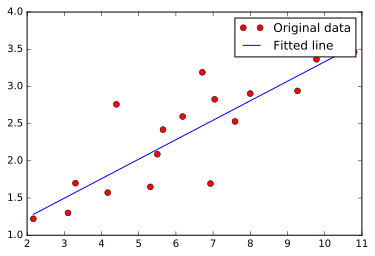

In [13]:
#Graphic display
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.plot(train_X, train_Y, 'ro', label='Original data')
plt.plot(train_X, Yprime, label='Fitted line')
plt.legend()
plt.show()